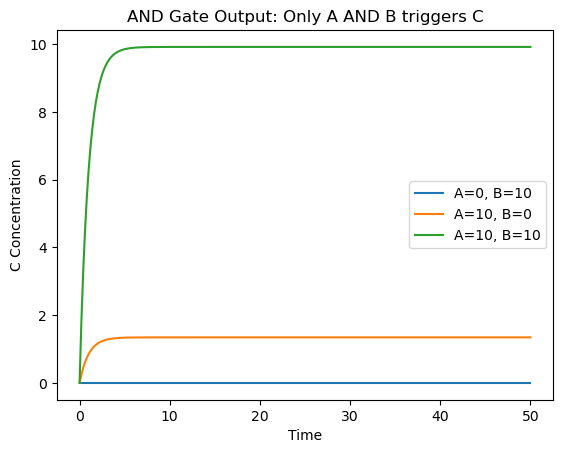

In [10]:
import tellurium as te
import matplotlib.pyplot as plt

model = te.loada("""
model AND_GATE()
// Species
species A, B, C
// Parameters
k = 10; //max production rate of C
K = 5; //activation threshold
n = 8; //Hill Coefficient
d = 1; //degradation rate
                 
// Input Signals( change these late )
A = 0
B = 0
C = 0

// AND gate logic for c production
J1: -> C; k*(A^n/(K^n+A^n))*(B^n/(K^n+B^n))
J2: C -> ; d*C
end
""")

model.reset()
model.A = 0
model.B = 10
r1 = model.simulate(0, 50, 500)

model.reset()
model.A = 7
model.B = 4
r2 = model.simulate(0, 50, 500)

model.reset()
model.A = 10
model.B = 10
r3 = model.simulate(0, 50, 500)

plt.plot(r1[:,0], r1[:,3], label="A=0, B=10")
plt.plot(r2[:,0], r2[:,3], label="A=10, B=0")
plt.plot(r3[:,0], r3[:,3], label="A=10, B=10")
plt.xlabel('Time')
plt.ylabel("C Concentration")
plt.title("AND Gate Output: Only A AND B triggers C")
plt.legend()
plt.show()